In [6]:
from os import path
from glob import glob

import zarr
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from skimage import transform, io, filters, morphology, measure

from tqdm import tqdm
from skimage.io import imsave
import cellpose
from collections.abc import Iterable
!pip install line_profiler
%load_ext line_profiler

2021-07-01 20:11:18,780 [INFO] WRITING LOG OUTPUT TO /home/fukai/.cellpose/run.log


In [7]:
import torch
device=torch.device("cuda:0")
torch.zeros([0,1,2]).to(device)

tensor([], device='cuda:0', size=(0, 1, 2))

In [8]:
basedir= "/mnt/showers2_tmp/TEMPORARY/Fukai-ImageAnalysis/2021-06-08-timelapse/210615-HL60-atRA1-staining2-01_analyzed"
!ls $basedir -l

total 411512
drwxrwxrwx 2 wcs wcs         0 Jun 16 16:22 averaged_background
-rwxrwxrwx 1 wcs wcs 335468544 Jun 16 16:21 background_per_tile.hdf5
drwxrwxrwx 2 wcs wcs         0 Jun 16 16:22 calcluate_background_log
-rwxrwxrwx 1 wcs wcs  83865728 Jun 16 17:38 camera_dark_image.npy
-rwxrwxrwx 1 wcs wcs       159 Jun 16 16:22 image_props.yaml
-rwxrwxrwx 1 wcs wcs   1546896 Jun 16 16:18 metadata.xml
-rwxrwxrwx 1 wcs wcs    151216 Jun 16 17:44 planes_df2.csv
-rwxrwxrwx 1 wcs wcs    156509 Jun 16 17:50 planes_df3.csv
-rwxrwxrwx 1 wcs wcs    115263 Jun 16 16:20 planes_df.csv
-rwxrwxrwx 1 wcs wcs       376 Jun 30 16:54 process_stitching_params.yaml
drwxrwxrwx 2 wcs wcs         0 Jun 16 17:38 rescale_background_log
drwxrwxrwx 2 wcs wcs         0 Jun 16 17:44 rescaled_background
drwxrwxrwx 2 wcs wcs         0 Jun 16 17:39 rescaled_images
drwxrwxrwx 2 wcs wcs         0 Jun 16 17:39 rescale_images_log
drwxrwxrwx 2 wcs wcs         0 Jun 30 16:55 stitched_image_divide_thumbnail
drwxrwxrwx 2 wcs wcs 

In [5]:
basedir= "/mnt/showers2_tmp/TEMPORARY/Fukai-ImageAnalysis/2021-06-08-timelapse/210608-HL60-atRA1-live-01-1.czi/210608-HL60-atRA1-live-01-1_AcquisitionBlock1.czi/210608-HL60-atRA1-live-01-1_AcquisitionBlock1_pt1_analyzed"
!ls $basedir -l

total 8179992
drwxrwxrwx 2 wcs wcs          0 Jun 16 14:24 averaged_background
-rwxrwxrwx 1 wcs wcs 8302700544 Jun 16 14:23 background_per_tile.hdf5
drwxrwxrwx 2 wcs wcs          0 Jun 16 14:24 calcluate_background_log
-rwxrwxrwx 1 wcs wcs   62899328 Jun 16 17:38 camera_dark_image.npy
-rwxrwxrwx 1 wcs wcs        154 Jun 16 14:24 image_props.yaml
-rwxrwxrwx 1 wcs wcs    4997942 Jun 16 14:04 metadata.xml
-rwxrwxrwx 1 wcs wcs    1985302 Jun 16 18:27 planes_df2.csv
-rwxrwxrwx 1 wcs wcs    2060130 Jun 16 19:45 planes_df3.csv
-rwxrwxrwx 1 wcs wcs    1515170 Jun 16 14:14 planes_df.csv
-rwxrwxrwx 1 wcs wcs        780 Jun 30 17:21 process_stitching_params.yaml
drwxrwxrwx 2 wcs wcs          0 Jun 16 17:38 rescale_background_log
drwxrwxrwx 2 wcs wcs          0 Jun 16 18:27 rescaled_background
drwxrwxrwx 2 wcs wcs          0 Jun 16 17:39 rescaled_images
drwxrwxrwx 2 wcs wcs          0 Jun 16 17:39 rescale_images_log
drwxrwxrwx 2 wcs wcs          0 Jun 30 17:22 stitched_image_divide_thumbnail
drwxr

In [9]:
zarr_path=path.join(basedir,"stitched_image_divide.zarr")
zarr_file=zarr.open(zarr_path,"r")

In [10]:
!ls $zarr_path/image/.zarray -al

-rwxrwxrwx 1 wcs wcs 413 Jun 30 16:49 /mnt/showers2_tmp/TEMPORARY/Fukai-ImageAnalysis/2021-06-08-timelapse/210615-HL60-atRA1-staining2-01_analyzed/stitched_image_divide.zarr/image/.zarray


2021-07-01 20:11:25,608 [WARNING] findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.


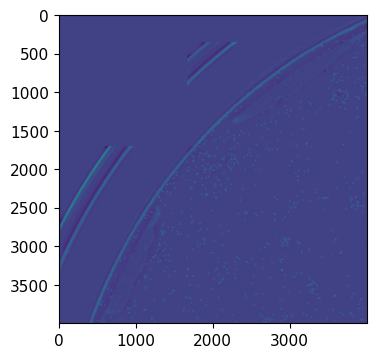

In [12]:
roi=(1000,5000,0,4000)
ds_image=zarr.open(zarr_path,"r")["image"]
plt.imshow(ds_image[0,0,0,roi[0]:roi[1],roi[2]:roi[3]])

In [15]:
model_path="/mnt/showers/AxioObserver7/ImageData/Fukai/cellpose/models/cellpose_residual_on_style_on_concatenation_off_cellpose_2021_04_02_08_32_54.191693"
import logging
from cellpose import models, dynamics
import sys
models.models_logger.setLevel(logging.INFO)
models.models_logger.addHandler(logging.StreamHandler(sys.stdout))
import cellpose_prediction
import importlib
importlib.reload(cellpose_prediction)
%lprun cellpose_prediction.cellpose_prediction(zarr_path,model_path,show_segmentation_ind_ratio=10,roi=roi,ipcluster_execute=False)

  0%|          | 0/2 [00:00<?, ?it/s]default_a9e0cdddf84f380c93d487a3f0bb1c43
default_0e119c9bc74ac41151b68de01c9de816
{'zarr_path': '/mnt/showers2_tmp/TEMPORARY/Fukai-ImageAnalysis/2021-06-08-timelapse/210615-HL60-atRA1-staining2-01_analyzed/stitched_image_divide.zarr', 'cyto_channel': 'Phase', 'nucleus_channels': None, 'ipcluster_nproc': 4, 'ipcluster_execute': False, 'cellpose_model_path': '/mnt/showers/AxioObserver7/ImageData/Fukai/cellpose/models/cellpose_residual_on_style_on_concatenation_off_cellpose_2021_04_02_08_32_54.191693', 'cellpose_normalize': True, 'cellprob_threshold': 0.0, 'diameter': 0, 'flow_threshold': 0.4, 'gpu_count': 4, 'roi': (1000, 5000, 0, 4000), 'show_segmentation_ind_ratio': 10, 'suffix': ''}
[(0, (0, 0)), (1, (1, 0))]
0
0 4 gpu:  0
2021-07-01 20:12:50,695 [INFO] parsing model string cellpose_residual_on_style_on_concatenation_off_cellpose_2021_04_02_08_32_54.191693 to get cellpose options
/home/fukai/.anaconda3/envs/image_analysis/lib/python3.8/site-package

Timer unit: 1e-06 s

### normal
- 1000 x 1000 12.83s/it
- 2000 x 2000 22.64s/it
- 4000 x 4000 64.39s/it

### ipcluster
- 4000 x 4000 89s


whole image ... should be 1.2 * 9 min = 10 min or so

In [42]:
testarr=np.zeros((10,10),dtype=np.int8)
testarr[1:3,5:8]=1
testarr[6:8,2:4]=2
print(testarr)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 0 0 0 0 0 0]
 [0 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [43]:
testarr2=np.ma.array(testarr,mask=testarr==1,fill_value=0)

In [44]:
print(testarr2)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 -- -- -- 0 0]
 [0 0 0 0 0 -- -- -- 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 0 0 0 0 0 0]
 [0 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [45]:
from skimage import measure

In [53]:
r=measure.regionprops(testarr2.filled())

In [54]:
r=r[0]

In [ ]:
ys,xs=r.coords.T

In [57]:
r.label

2